<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project2/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Processing

In [1]:

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define input image shape and batch size
IMG_HEIGHT, IMG_WIDTH = 500, 500
BATCH_SIZE = 32

# Set up directories
train_dir = '/content/drive/MyDrive/Project 2 Data/Data/train'
validation_dir = '/content/drive/MyDrive/Project 2 Data/Data/valid'
test_dir = '/content/drive/MyDrive/Project 2 Data/Data/test'

# Define augmentation pipeline for training data
train_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.2),  # Randomly rotate images
    tf.keras.layers.RandomZoom(0.2),  # More aggressive zoom
    tf.keras.layers.RandomFlip("horizontal"),  # Random flipping
])

# Rescaling only for validation and test data
val_test_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",  # Multi-class classification
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (train_data_gen(x, training=True), y))  # Apply augmentation pipeline

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (val_test_data_gen(x, training=False), y))  # Apply rescaling



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


Step 2: Neural Network Architecture Design

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# 1. Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 2. Add a second Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 3. Add a third Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 4. Flatten the output
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))  # First dense layer
model.add(layers.Dropout(0.3))  # Dropout after first dense layer
# model.add(layers.Dense(64, activation='relu'))  # Second dense layer
# model.add(layers.Dropout(0.3))  # Dropout after second dense layer



# 6. Output Layer
model.add(layers.Dense(3, activation='softmax'))  # 3 neurons for 3 classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 498, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 498, 498, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 247, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 247, 247, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 123, 123, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 121, 121, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 121, 121, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 460800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      29,491,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,585,603 (112.86 MB)

 Trainable params: 29,585,155 (112.86 MB)

 Non-trainable params: 448 (1.75 KB)

Step 3: Hyperparameter Analysis

In [3]:
from tensorflow.keras import layers, models, optimizers

# Define model with tunable hyperparameters
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=None, input_shape=(500, 500, 3)),  # No activation here
    layers.LeakyReLU(alpha=0.1),  # LeakyReLU activation
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),  # Standard ReLU for comparison
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),  # ELU for dense layer
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # Softmax for final layer
])

# Compile with a different optimizer (e.g., RMSprop)
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model without EarlyStopping
history = model.fit(train_dataset, validation_data=validation_dataset, epochs= 40)



Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 770s 12s/step - accuracy: 0.4011 - loss: 2.5677 - val_accuracy: 0.4919 - val_loss: 0.9840
Epoch 2/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5492 - loss: 0.9486 - val_accuracy: 0.6450 - val_loss: 0.8351
Epoch 3/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6299 - loss: 0.8181 - val_accuracy: 0.6288 - val_loss: 0.8075
Epoch 4/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.6612 - loss: 0.7585 - val_accuracy: 0.5893 - val_loss: 0.8630
Epoch 5/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6707 - loss: 0.7129 - val_accuracy: 0.6682 - val_loss: 0.7338
Epoch 6/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.6813 - loss: 0.6931 - val_accuracy: 0.6682 - val_loss: 0.7074
Epoch 7/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6824 - loss: 0.6775 - val_accuracy: 0.7216 - val_loss: 0.6952
Epoch 8/40
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6953 - loss: 0.6789 - val_accuracy: 0.7216 - val_loss: 0

Step 4: Model Evaluation

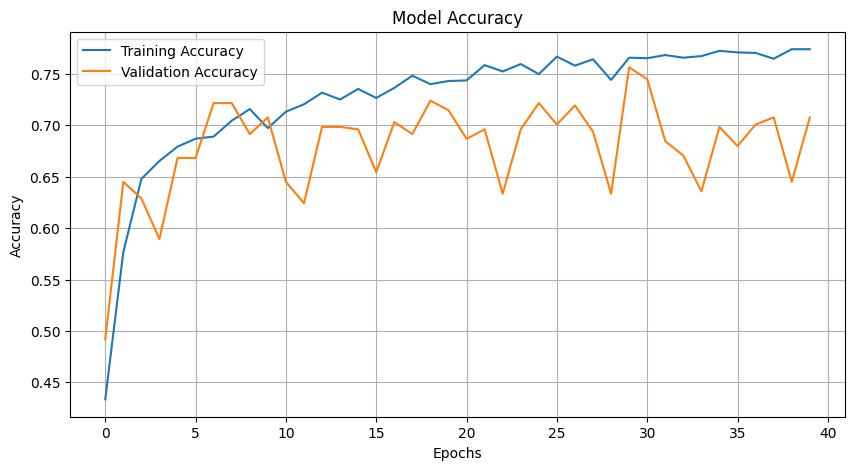

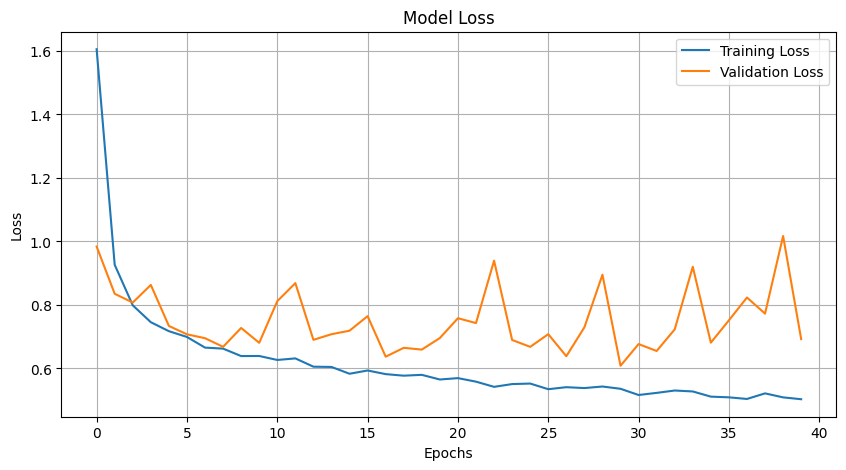

In [4]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Step 5: Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


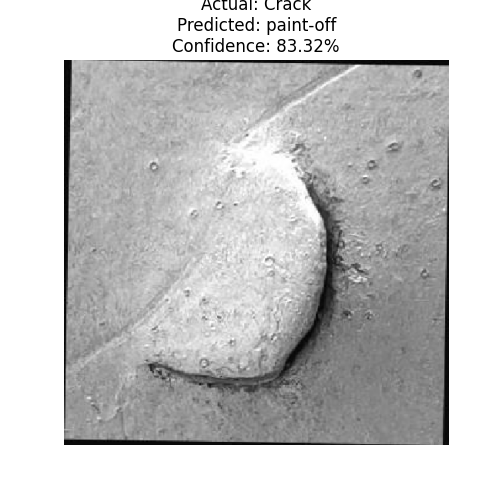

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


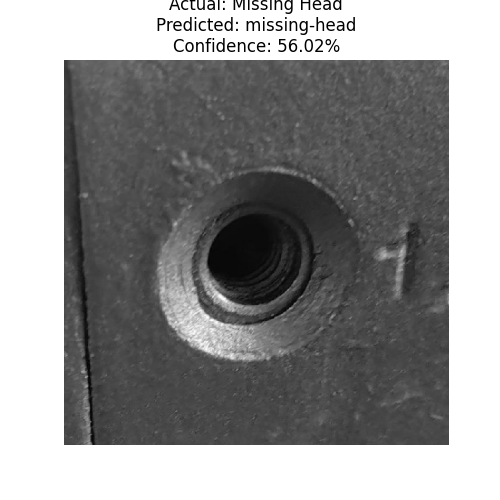

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


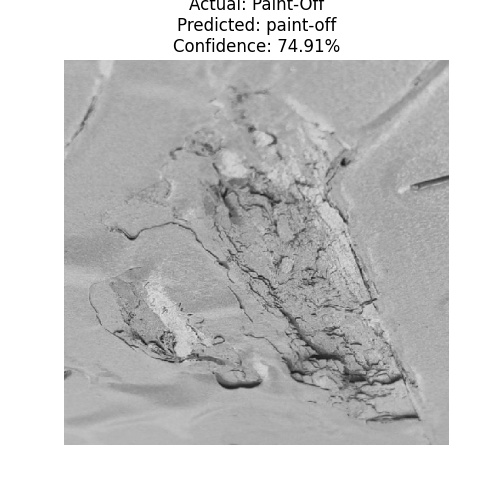

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# List of test images with actual labels (modify paths and labels accordingly)
test_images = [
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/crack/test_crack.jpg', 'label': 'Crack'},
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/missing-head/test_missinghead.jpg', 'label': 'Missing Head'},
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/paint-off/test_paintoff.jpg', 'label': 'Paint-Off'}
]

# Class labels
class_labels = ['crack', 'missing-head', 'paint-off']

# Function to preprocess a single image
def preprocess_image(img_path, target_size=(500, 500)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, np.array(img)  # Return both normalized array and original image as NumPy array

# Predict, save, and display individual results
for i, test_img in enumerate(test_images):
    # Preprocess image
    img_array, img = preprocess_image(test_img['path'])

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img.astype("uint8"))
    plt.axis('off')
    plt.title(
        f"Actual: {test_img['label']}\n"
        f"Predicted: {predicted_label}\n"
        f"Confidence: {confidence:.2f}%"
    )

    # Save the image as a separate file
    filename = f"prediction_{i + 1}.png"
    plt.savefig(filename)
    plt.close()

    # Display the saved image
    display(Image(filename=filename))

